# Jon Williamson

## Preprocessing




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [2]:
df = pd.read_csv('master_data7.csv', index_col=0)
df.fillna(0, inplace=True)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,-1.000000,-1
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because no coach has ever been  an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 9-140 and 142-150 were normalized using a z-score transformation vs. all teams in the league in that year. This normalization  roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [4]:
df = df[df['Coach Tenure Class'] != -1]
"""
temp_df = df.iloc[:,2:76].join(df.iloc[:,142:-2])
print(temp_df.head(5))
"""
X = df.iloc[:,2:-2]
y = df.iloc[:,-1]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
1,47,0,0,0,0,12,0,0,0.000000,0.000000,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0
2,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0
3,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0
4,44,0,8,0,12,0,0,0,0.000000,0.000000,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0
5,25,0,0,0,0,0,0,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
y.head(5)

1    1
2    1
3    0
4    0
5    0
Name: Coach Tenure Class, dtype: int64

The `create_data.py` file segments coach tenure into three classes as such:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Coach Hire Duration (Years)</th>
    <th class="tg-fymr">Class Label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1-2</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3-4</td>
    <td class="tg-0pky">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5+</td>
    <td class="tg-0pky">2</td>
  </tr>
</tbody>
</table>

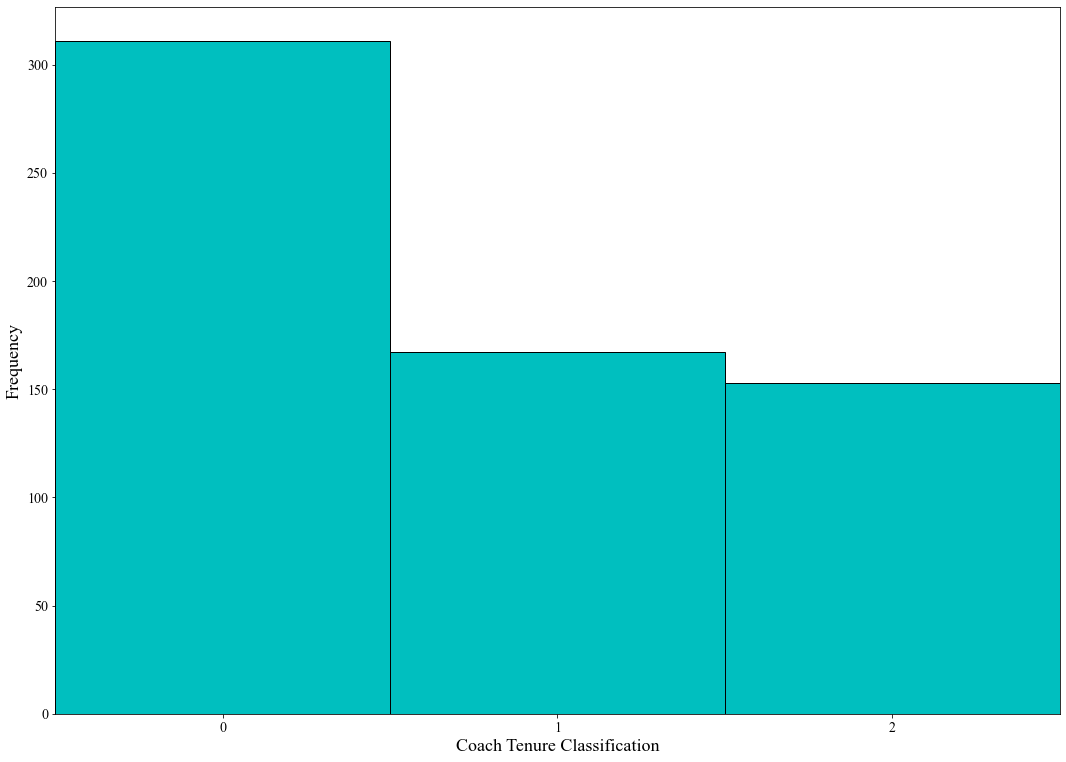

In [6]:
#rcParams['figure.figsize'] = 9, 6.5
raw_coach_class = y.values.T
raw_coach_class_mean = np.mean(raw_coach_class)
plt.hist(raw_coach_class, bins=[-.5,.5,1.5,2.5], color='c', edgecolor='k')
plt.xlim(-0.5,2.5)
plt.xticks(ticks=[0,1,2])
plt.xlabel('Coach Tenure Classification')
plt.ylabel('Frequency')
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The white boxes in the matrix show that that offensive and defensive coordinator metrics have no correlation. This is expected, as no coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

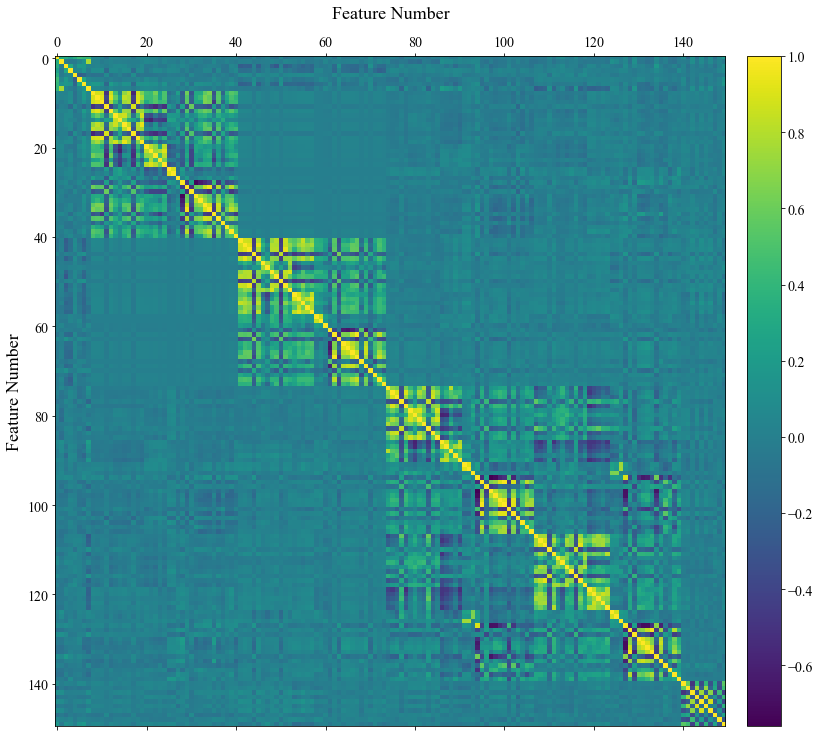

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
#plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
#plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-720)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, stratify=y, random_state=0)

## Model 1: Logistic Regression with Lasso Regularization

Necessary Imports:

In [9]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [10]:
log_param_dict = {
    #"C":     [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
    "C":     [.001, .01, .1, 1]
}

log_best_params_dict = {key: [] for key in log_param_dict.keys()}

log_result_dict = {     'train_score':  [],
                        'test_score':   [],
                        'coef_':        {
                            0: [],
                            1: [],
                            2: []
                        }
}

num_of_folds    = 10
max_iter        = 1e6

default_log_params = {
    'verbose':      False,
    'penalty':      'l1',
    'solver':       'saga',
    'n_jobs':       1,
    'multi_class':  'multinomial',
    'max_iter':     max_iter
}

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(LogisticRegression(**default_log_params), param_grid=log_param_dict, n_jobs=-1, cv=5, verbose=1, scoring='roc_auc_ovr').fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        log_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    log_result_dict['coef_'][0].append(best_model.coef_[0])
    log_result_dict['coef_'][1].append(best_model.coef_[1])
    log_result_dict['coef_'][2].append(best_model.coef_[2])

    log_result_dict['test_score'].append(roc_auc_score(y_test_, best_model.predict_proba(X_test__), average='macro', multi_class='ovr'))
    log_result_dict['train_score'].append(roc_auc_score(y_train_, best_model.predict_proba(X_train__), average='macro', multi_class='ovr'))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.6s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.7s finished


The following code prints the average AUROC value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient for each class-specific regression. 

In [11]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(log_result_dict['train_score']), np.mean(log_result_dict['test_score'])))
print(log_best_params_dict)

Average Train AUROC: 0.767
Average Test AUROC: 0.611
{'C': [1, 1, 1, 1, 1, 0.1, 0.1, 1, 0.1, 1]}


The following code plots the feature importance weights for each class for the ovr in the training method. 

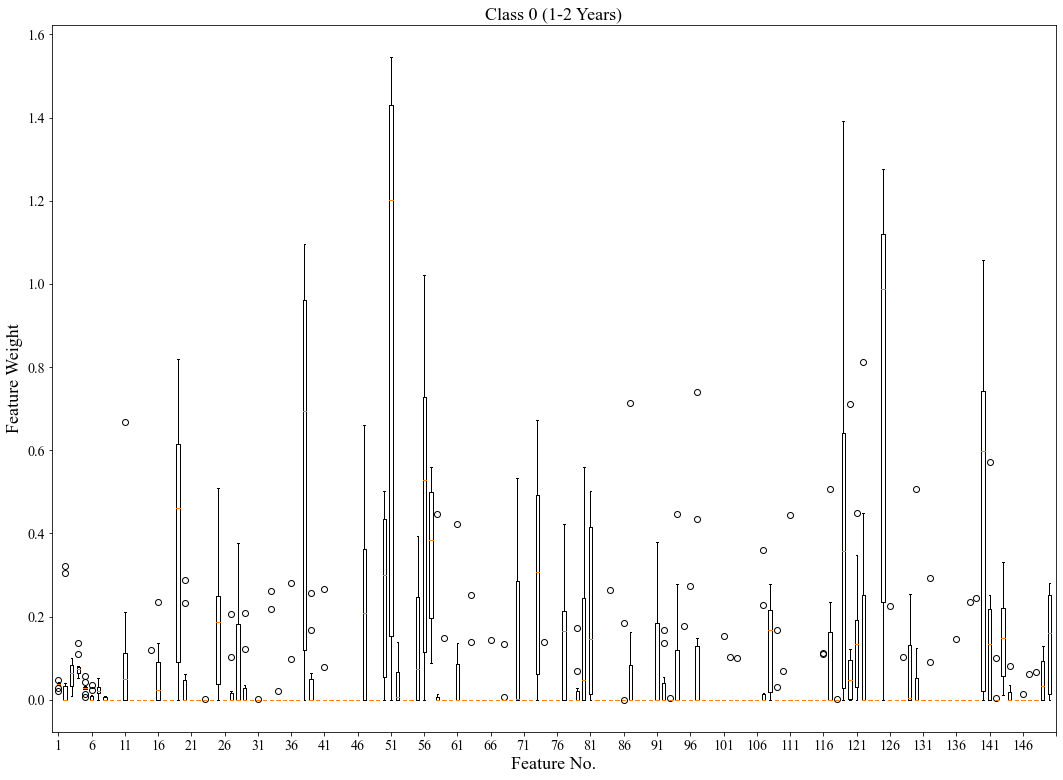

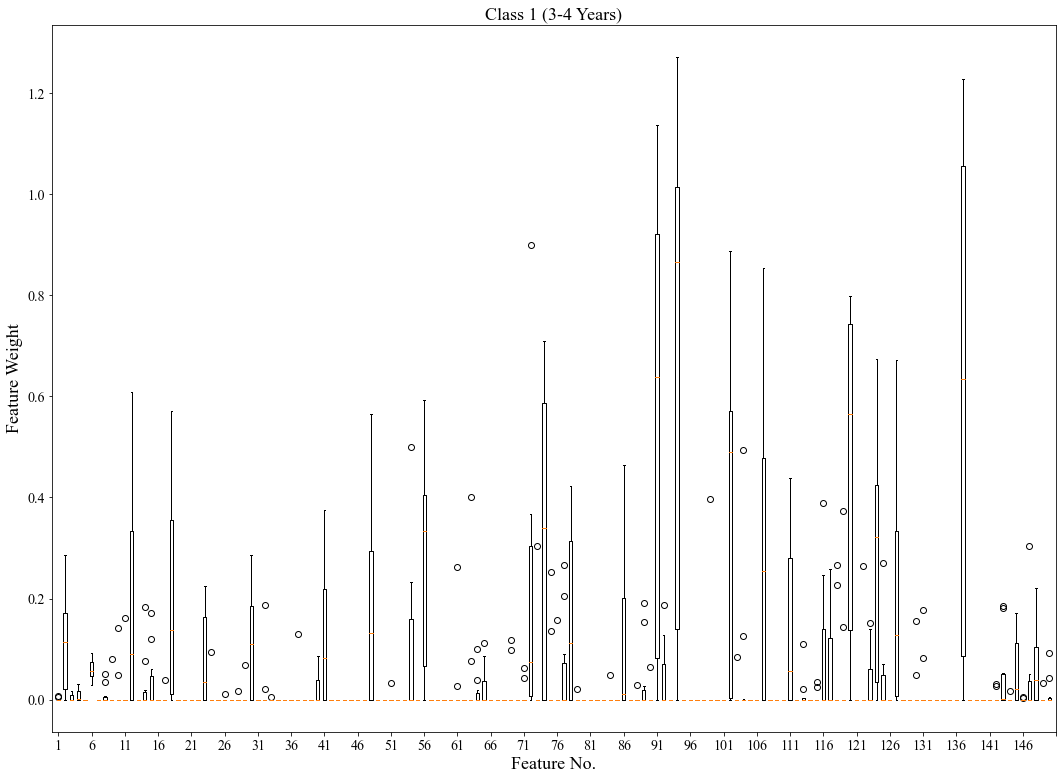

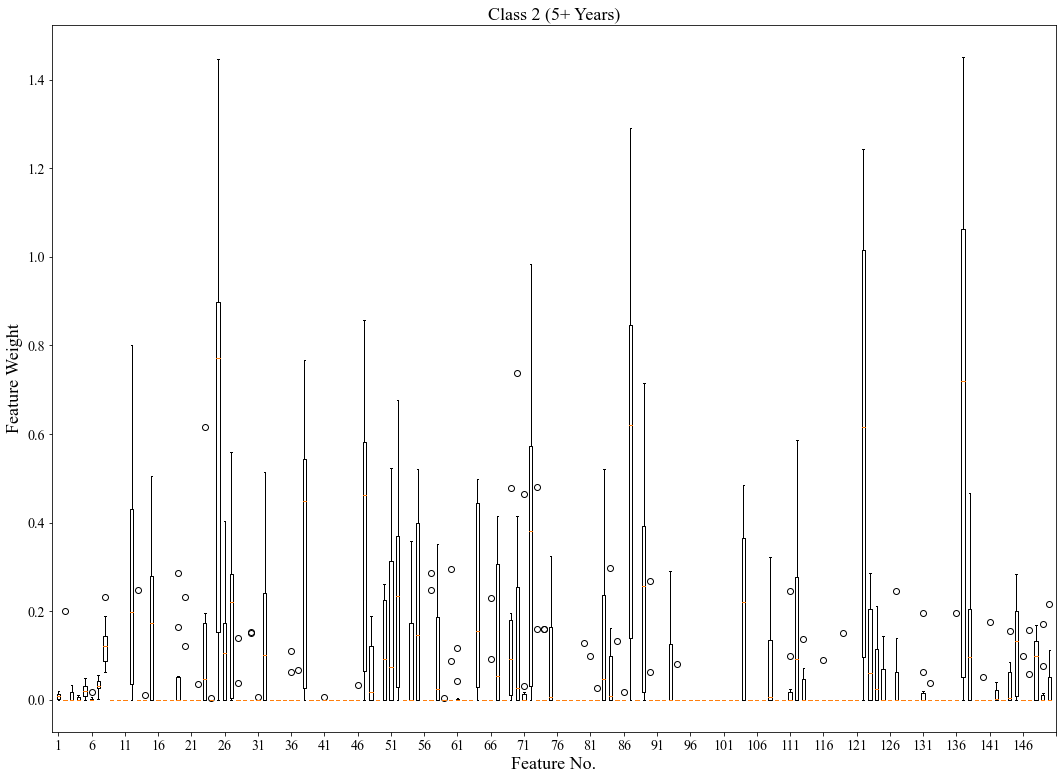

In [12]:
def plot_coef(coef_list_dict, title):
    coef_list = [np.abs(l) for l in zip(*coef_list_dict)]
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.boxplot(coef_list)
    plt.xlim(0, len(coef_list) + 1)
    #plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
    plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
    plt.xlabel('Feature No.')
    plt.ylabel('Feature Weight')
    plt.title(title)
    plt.show()
    
plot_coef(log_result_dict['coef_'][0], 'Class 0 (1-2 Years)')
plot_coef(log_result_dict['coef_'][1], 'Class 1 (3-4 Years)')
plot_coef(log_result_dict['coef_'][2], 'Class 2 (5+ Years)')

The following code prints the average (non-absolute) values for each ovr regression to compare feature importances across classes.

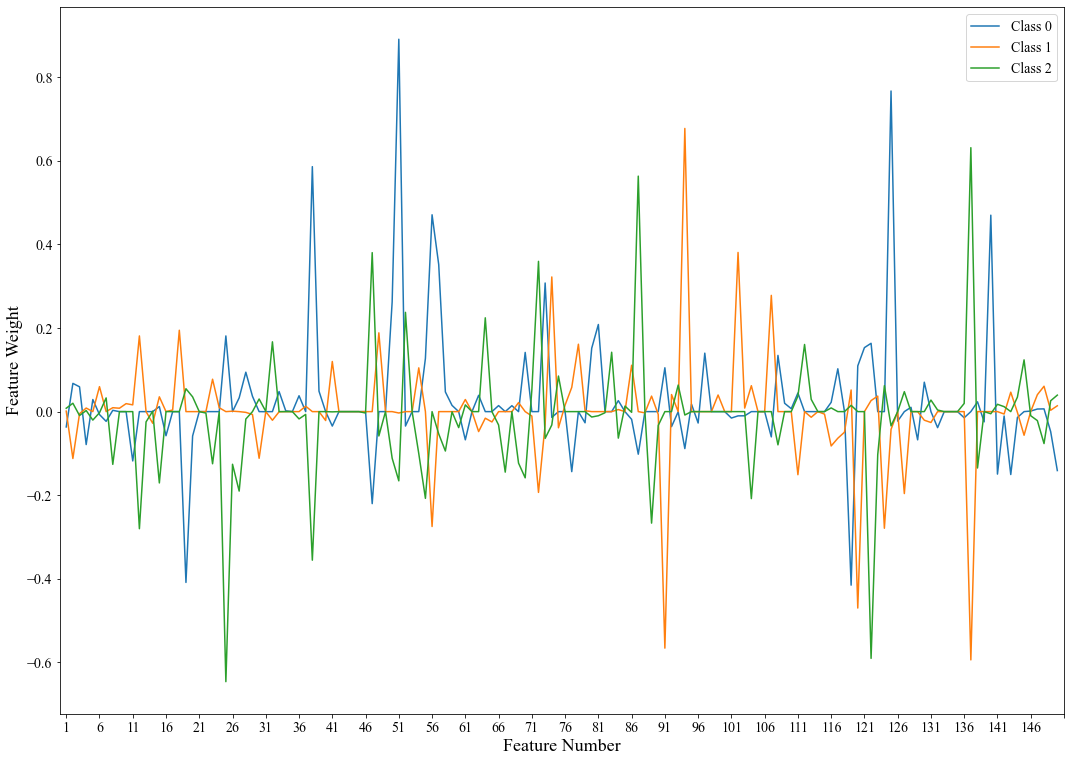

In [13]:
def plot_coefs(coef_list_dict_dict):
    count = 0
    for coef_list_dict in coef_list_dict_dict.values():
        coef_list = [np.mean(l) for l in zip(*coef_list_dict)]
        plt.plot(np.arange(1, len(coef_list) + 1), coef_list, label='Class {}'.format(count))
        count += 1
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.xlim(0, len(coef_list))
    #plt.xticks(np.arange(1, len(label_list) + 1 ), labels=label_list)
    plt.xticks(np.arange(1, len(label_list) + 1 , 5), labels=label_list[::5])
    plt.ylabel('Feature Weight')
    plt.xlabel('Feature Number')
    #plt.ylim(-1,1)
    plt.legend()
    
plot_coefs(log_result_dict['coef_'])

The following code prints feature importance rankings for each class. 

In [14]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
        count += 1

In [15]:
print_feature_importances(log_result_dict['coef_'][0], X.columns.values)

Rank  1: Feature 51, has an avg. importance of 0.8908 with a std. dev. of 0.6351.
Rank  2: Feature 125, has an avg. importance of 0.7669 with a std. dev. of 0.5125.
Rank  3: Feature 38, has an avg. importance of 0.5860 with a std. dev. of 0.4232.
Rank  4: Feature 56, has an avg. importance of 0.4709 with a std. dev. of 0.3460.
Rank  5: Feature 140, has an avg. importance of 0.4699 with a std. dev. of 0.3883.
Rank  6: Feature 119, has an avg. importance of 0.4151 with a std. dev. of 0.4176.
Rank  7: Feature 19, has an avg. importance of 0.4086 with a std. dev. of 0.2984.
Rank  8: Feature 57, has an avg. importance of 0.3518 with a std. dev. of 0.1648.
Rank  9: Feature 73, has an avg. importance of 0.3076 with a std. dev. of 0.2419.
Rank 10: Feature 50, has an avg. importance of 0.2624 with a std. dev. of 0.1927.
Rank 11: Feature 47, has an avg. importance of 0.2201 with a std. dev. of 0.2216.
Rank 12: Feature 81, has an avg. importance of 0.2084 with a std. dev. of 0.1964.
Rank 13: Feat

In [16]:
print_feature_importances(log_result_dict['coef_'][1], X.columns.values)

Rank  1: Feature 94, has an avg. importance of 0.6774 with a std. dev. of 0.4825.
Rank  2: Feature 137, has an avg. importance of 0.5939 with a std. dev. of 0.4716.
Rank  3: Feature 91, has an avg. importance of 0.5658 with a std. dev. of 0.4336.
Rank  4: Feature 120, has an avg. importance of 0.4699 with a std. dev. of 0.3194.
Rank  5: Feature 102, has an avg. importance of 0.3807 with a std. dev. of 0.3316.
Rank  6: Feature 74, has an avg. importance of 0.3221 with a std. dev. of 0.2872.
Rank  7: Feature 124, has an avg. importance of 0.2790 with a std. dev. of 0.2241.
Rank  8: Feature 107, has an avg. importance of 0.2781 with a std. dev. of 0.2827.
Rank  9: Feature 56, has an avg. importance of 0.2748 with a std. dev. of 0.1983.
Rank 10: Feature 127, has an avg. importance of 0.1960 with a std. dev. of 0.2144.
Rank 11: Feature 18, has an avg. importance of 0.1947 with a std. dev. of 0.1916.
Rank 12: Feature 72, has an avg. importance of 0.1932 with a std. dev. of 0.2703.
Rank 13: F

In [17]:
print_feature_importances(log_result_dict['coef_'][2], X.columns.values)

Rank  1: Feature 25, has an avg. importance of 0.6460 with a std. dev. of 0.4730.
Rank  2: Feature 137, has an avg. importance of 0.6314 with a std. dev. of 0.5161.
Rank  3: Feature 122, has an avg. importance of 0.5902 with a std. dev. of 0.4660.
Rank  4: Feature 87, has an avg. importance of 0.5633 with a std. dev. of 0.4175.
Rank  5: Feature 47, has an avg. importance of 0.3803 with a std. dev. of 0.2875.
Rank  6: Feature 72, has an avg. importance of 0.3594 with a std. dev. of 0.3163.
Rank  7: Feature 38, has an avg. importance of 0.3554 with a std. dev. of 0.2894.
Rank  8: Feature 12, has an avg. importance of 0.2801 with a std. dev. of 0.2619.
Rank  9: Feature 89, has an avg. importance of 0.2667 with a std. dev. of 0.2459.
Rank 10: Feature 52, has an avg. importance of 0.2375 with a std. dev. of 0.2121.
Rank 11: Feature 64, has an avg. importance of 0.2244 with a std. dev. of 0.1981.
Rank 12: Feature 104, has an avg. importance of 0.2081 with a std. dev. of 0.1888.
Rank 13: Feat

The following code predicts the classes for the held out test set and displays the results. 

In [18]:
from scipy.stats import mode
plot_pred = None
model = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    #model = LogisticRegression(C=np.mean(log_best_params_dict['C'])).fit(X_train__, y_train)
    print(np.mean(log_best_params_dict['C']))
    model = LogisticRegression(C=mode(log_best_params_dict['C'])[0][0]).fit(X_train__, y_train)

    plot_pred = model.predict(X_test__)

0.73


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
log_best_params_dict

{'C': [1, 1, 1, 1, 1, 0.1, 0.1, 1, 0.1, 1]}

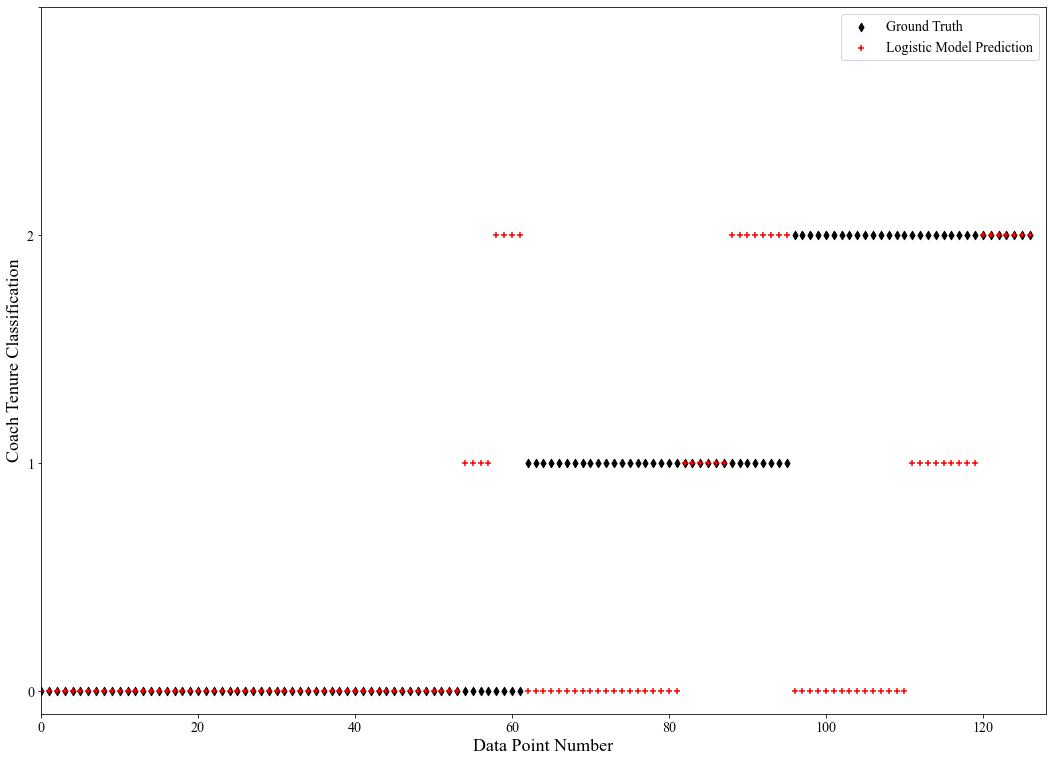

In [20]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='Logistic Model Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [21]:
print('AUROC: {:.3f}'.format(roc_auc_score(y_test, best_model.predict_proba(X_test__), average='macro', multi_class='ovr')))
print('AUROC When always preidcting class 0: {:.3f}'.format(roc_auc_score(y_test, [[1,0,0]] * len(X_test__), average='macro', multi_class='ovr')))

AUROC: 0.588
AUROC When always preidcting class 0: 0.500


These results show that the regularized logistic regression tends to predict class 0, the most frequent class, at a disproportionate rate. Nonetheless, the model does have a suurprisingly high weighted AUROC of .644. The AUROC when always predicting class 0 is .500, showing that the logistic regression does provide useful differentiation and adds value to tenure prediction.

## Model 2: XGBoost Classifier

Necessary Imports:

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [23]:
"""
xgbr_param_dict = {
    "n_estimators":     [10, 25, 50, 100, 200],
    "learning_rate":    [.01, .05, .1, .2],
    "max_depth":        [2, 4, 6, 8, 10],
    "gamma":            [0, .001, .01, .1],
    "reg_lambda":       [0, .01, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [25, 50, 100],
    "learning_rate":    [.05, .1, .2, .3],
    "max_depth":        [2, 3],
    "gamma":            [0, .01, .1],
    "reg_lambda":       [0, .01] 
}

xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBClassifier(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    xgbr_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    xgbr_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.2s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   12.6s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.0s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.2s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.7s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.1s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.1s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.1s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   12.9s finished


In [24]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(xgbr_result_dict['train_score']), np.mean(xgbr_result_dict['test_score'])))

Average Train AUROC: 0.900
Average Test AUROC: 0.654


In [25]:
xgbr_best_params_dict

{'n_estimators': [25, 25, 25, 50, 50, 25, 25, 50, 100, 25],
 'learning_rate': [0.05, 0.1, 0.2, 0.2, 0.2, 0.1, 0.05, 0.1, 0.05, 0.2],
 'max_depth': [2, 2, 2, 2, 2, 2, 3, 2, 3, 2],
 'gamma': [0, 0.1, 0.1, 0.01, 0, 0, 0, 0.1, 0, 0],
 'reg_lambda': [0, 0, 0.01, 0.01, 0, 0.01, 0, 0, 0.01, 0.01]}

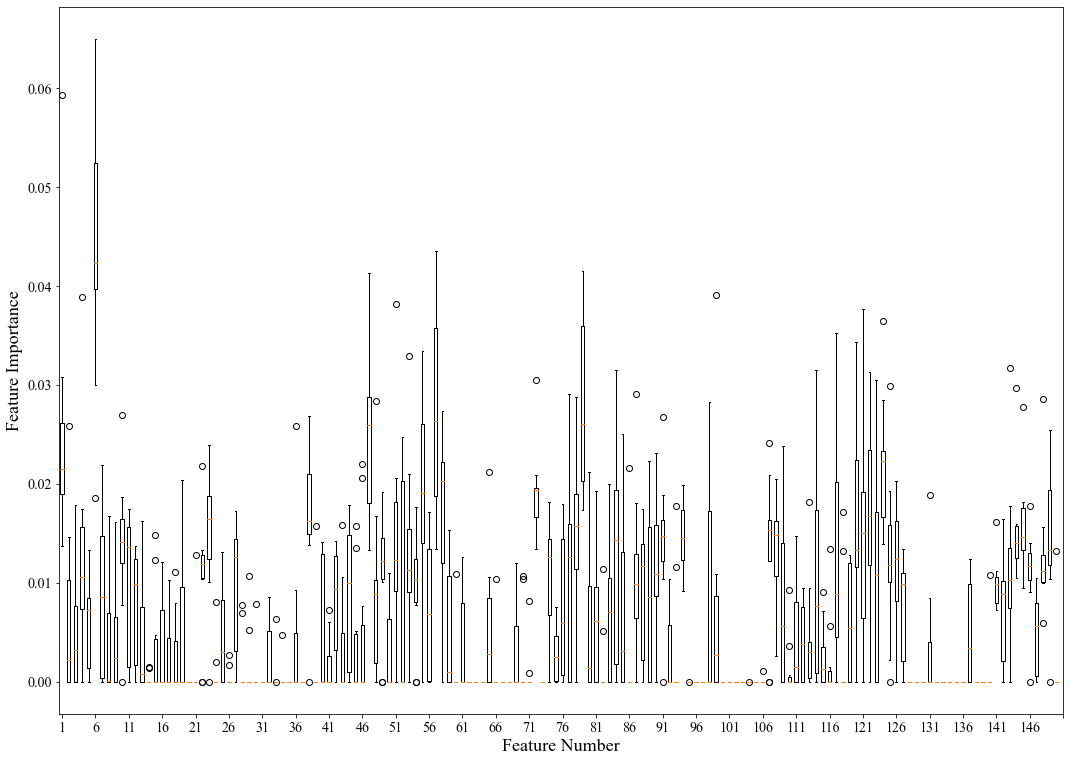

In [26]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=xgbr_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [27]:
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Feature 6, has an avg. importance of 0.0439 with a std. dev. of 0.0131.
Rank  2: Feature 79, has an avg. importance of 0.0283 with a std. dev. of 0.0089.
Rank  3: Feature 57, has an avg. importance of 0.0270 with a std. dev. of 0.0099.
Rank  4: Feature 1, has an avg. importance of 0.0249 with a std. dev. of 0.0125.
Rank  5: Feature 47, has an avg. importance of 0.0248 with a std. dev. of 0.0082.
Rank  6: Feature 124, has an avg. importance of 0.0220 with a std. dev. of 0.0064.
Rank  7: Feature 72, has an avg. importance of 0.0193 with a std. dev. of 0.0043.
Rank  8: Feature 55, has an avg. importance of 0.0179 with a std. dev. of 0.0108.
Rank  9: Feature 122, has an avg. importance of 0.0167 with a std. dev. of 0.0091.
Rank 10: Feature 38, has an avg. importance of 0.0167 with a std. dev. of 0.0067.
Rank 11: Feature 120, has an avg. importance of 0.0162 with a std. dev. of 0.0090.
Rank 12: Feature 58, has an avg. importance of 0.0162 with a std. dev. of 0.0091.
Rank 13: Featur

The previously printed RMSE values show that the heavily cross-validated XGBoost has a better performance on both the testing and training sets within the cross validation. The performance on the test sets is quite remarkable at .938. This value is notable because the model was built using `GridSearchCV` with internal cross-validation. These results show that the model was able to create some generalizable functionality. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [28]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print(test_xgbr_best_params_dict)
    mean_imputer   = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBClassifier(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

{'n_estimators': 25, 'learning_rate': 0.2, 'max_depth': 2, 'gamma': 0, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}


In [29]:
xgbr.save_model('XGBC_best_params')

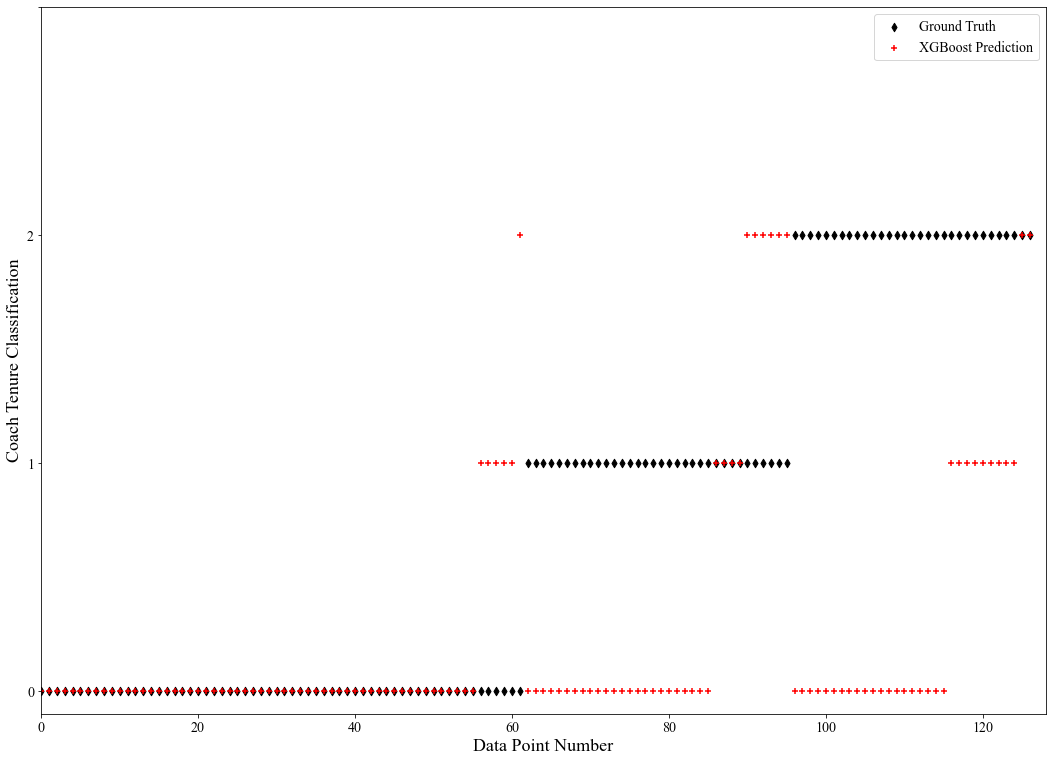

In [30]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [31]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, xgbr.predict_proba(X_test__), average='macro', multi_class='ovr')))

Average AUROC: 0.668


The previous plot shows that the XGBoost model has an impressive AUROC of .674. This is better than the logistic regression model, which had an AUROC of .644 on the same held-out test set. These test results show some promise of predicitive value.

In [32]:
def print_predictions(mod, arr, tenure_list):
    integer_lookup_list = []
    count = 0
    probas = mod.predict_proba(arr)
    for tenure in mod.predict(arr):
        if tenure in tenure_list:
            integer_lookup_list.append((count, probas[count]))  
        count += 1
    return integer_lookup_list

## Model 3: MLPClassifier

Necessary Imports:

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:

mlpc_param_dict = {
    "alpha":            [0, .0001, .001, .01],
    "tol":              [1e-4, 1e-5],
    "max_iter":         [200, 300, 400, 500]
    #"hidden_layer_sizes":   [(100,), (50, 25,), (50, 25, 15, 9,), (100, 100, 50, 50,),]
}
"""
mlpc_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001]
}
"""
mlpc_best_params_dict = {key: [] for key in mlpc_param_dict.keys()}

mlpc_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}

default_mlpc_params = {
    'solver':       'lbfgs',
    "activation":   'relu'
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPClassifier(**default_mlpc_params), param_grid=mlpc_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpc_best_params_dict[key].append(value)
    best_model = model.best_estimator_

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    mlpc_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    mlpc_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   17.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [35]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(mlpc_result_dict['train_score']), np.mean(mlpc_result_dict['test_score'])))

Average Train AUROC: 0.875
Average Test AUROC: 0.601


In [36]:
test_mlpc_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in mlpc_best_params_dict.items()}
print(test_mlpc_best_params_dict)
test_mlpc_best_params_dict.update(default_mlpc_params)
mean_imputer    = SimpleImputer()
imputed_X_train = mean_imputer.fit_transform(X_train)
imputed_X_test  = mean_imputer.transform(X_test)
mlpc = MLPClassifier(**test_mlpc_best_params_dict).fit(imputed_X_train, y_train)
plot_pred = mlpc.predict(imputed_X_test)

{'alpha': 0.001, 'tol': 0.0001, 'max_iter': 200}


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [37]:
mlpc_best_params_dict

{'alpha': [0, 0.001, 0.01, 0.01, 0, 0.001, 0.0001, 0.001, 0.001, 0.0001],
 'tol': [0.0001,
  0.0001,
  0.0001,
  1e-05,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  0.0001],
 'max_iter': [300, 200, 200, 200, 200, 200, 300, 200, 300, 200]}

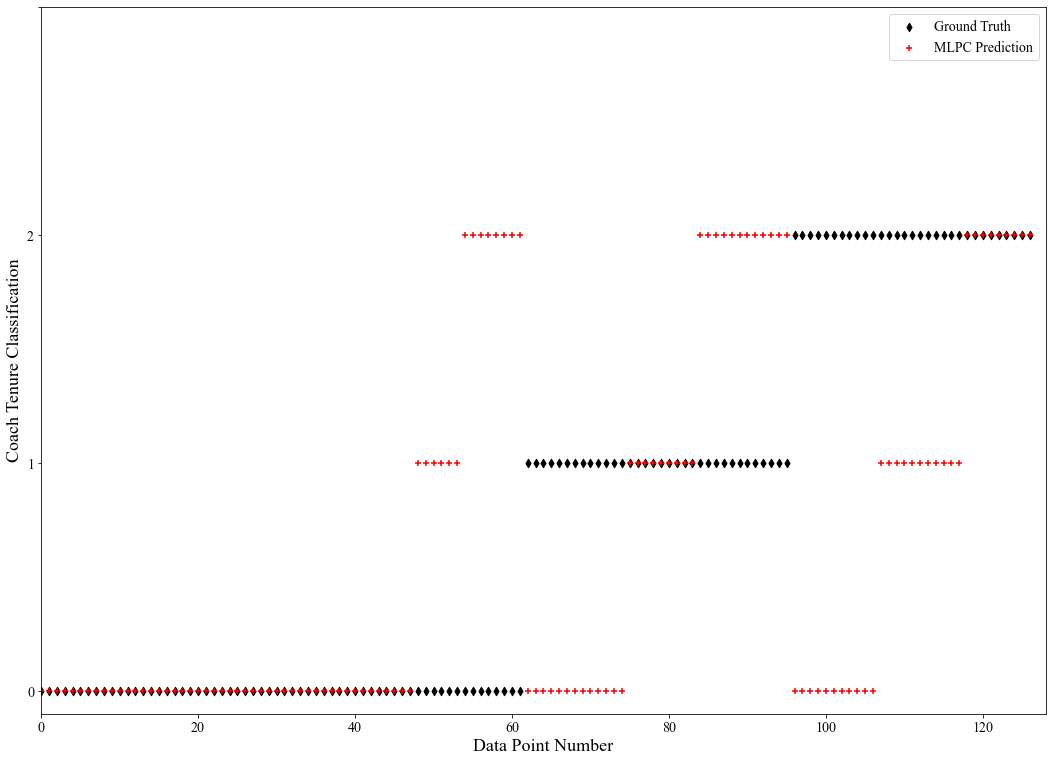

In [38]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='MLPC Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [39]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, mlpc.predict_proba(imputed_X_test), average='macro', multi_class='ovr')))

Average AUROC: 0.645


In [40]:
for index, probas in print_predictions(xgbr, imputed_X_test, [1]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Matt Patricia          2018  1 [0.2970379  0.47458282 0.22837928]
Rod Rust               1990  0 [0.28656945 0.4205681  0.29286242]
Steve Mariucci         2003  1 [0.11550915 0.72938335 0.15510751]
Dan Reeves             1997  2 [0.39010006 0.45709124 0.1528087 ]
John Fox               2002  2 [0.11055707 0.60310644 0.28633648]
Jon Gruden             2002  2 [0.21023104 0.6793196  0.11044939]
Bob Waterfield         1960  1 [0.31262133 0.38422027 0.3031584 ]
Ed Hughes              1971  0 [0.34283695 0.4042419  0.25292113]
Mike Holmgren          1999  2 [0.23657463 0.54933786 0.21408755]
Vince Tobin            1996  2 [0.26059702 0.49696875 0.24243419]
Richie Petitbon        1993  0 [0.24183762 0.40501338 0.35314903]
Dick Vermeil           2001  2 [0.30191854 0.53666526 0.16141619]
Mike McCarthy          2020  2 [0.23177332 0.6083017  0.159925  ]
Steve Wilks            2018  0 [0.08583817 0.58604026 0.32812154]
Eric Mangini           2009  0 [0.30904117 0.48261037 0.20834845]
Sean Payto

In [41]:
for index, probas in print_predictions(xgbr, imputed_X_test, [2]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Pete Carroll           1997  1 [0.35255584 0.20377816 0.443666  ]
Gus Bradley            2013  1 [0.23324935 0.37040997 0.3963407 ]
Bill Belichick         1991  2 [0.18335225 0.33958364 0.47706407]
Marty Schottenheimer   1989  2 [0.24909993 0.29503843 0.45586163]
June Jones             1994  1 [0.29944506 0.23469149 0.46586344]
Matt Nagy              2018  1 [0.23807581 0.26969758 0.49222657]
Buck Shaw              1958  1 [0.33428234 0.2105703  0.45514742]
Bobby Petrino          2007  0 [0.3524699  0.23691304 0.41061708]
Tom Fears              1967  1 [0.32647756 0.2931856  0.3803368 ]


In [42]:
for index, probas in print_predictions(mlpc, imputed_X_test, [2]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Sean McVay             2017  2 [0.08579252 0.18434527 0.72986222]
John Fox               2002  2 [0.10980444 0.26113504 0.62906053]
Pete Carroll           1997  1 [0.20097387 0.18315476 0.61587138]
Gus Bradley            2013  1 [0.0450692 0.3099547 0.6449761]
Bobby Ross             1997  1 [0.31306813 0.03012141 0.65681046]
Frank Kush             1984  0 [0.48741638 0.00591201 0.50667161]
Herm Edwards           2006  1 [0.10795703 0.05130159 0.84074138]
Chuck Knox             1992  1 [0.25143894 0.35287784 0.39568322]
Marty Schottenheimer   1989  2 [0.04913489 0.24393376 0.70693135]
June Jones             1994  1 [0.0071634  0.37639757 0.61643904]
Mike Shanahan          1995  2 [0.2124532  0.25122636 0.53632044]
Rob Chudzinski         2013  0 [0.08339242 0.44739046 0.46921712]
Chip Kelly             2013  1 [0.1946332  0.37753192 0.42783487]
John Harbaugh          2008  2 [0.23905474 0.30255638 0.45838888]
Bob Waterfield         1960  1 [0.20419629 0.30708696 0.48871674]
Ed Hughes    

In [43]:
df_ = pd.read_csv('master_data7.csv', index_col=0)
df_.fillna(0, inplace=True)
df_ = df_[df_['Coach Tenure Class'] == -1]
print(df_.shape)
df_.head(26)

(21, 154)


,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,-1.000000,-1
31,Ben Johnson,2025,39,0,1,0,0,4,3,0,...,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0,-1.000000,-1
69,Brian Callahan,2024,40,0,0,0,0,3,5,0,...,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0,0.176471,-1
70,Brian Daboll,2022,47,0,0,1,0,10,8,0,...,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0,0.455882,-1
72,Brian Schottenheimer,2025,52,0,2,1,0,8,14,0,...,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0,-1.000000,-1
132,Dan Quinn,2024,54,1,6,3,0,8,5,6,...,1.188696,-0.407393,0.337047,-0.828606,0.628450,-0.898061,0.866486,0.0,0.705882,-1
138,Dave Canales,2024,43,0,3,0,0,6,1,0,...,0.506368,-1.477273,-0.444299,-1.201064,-0.470088,-1.654772,-0.411087,0.0,0.294118,-1
144,DeMeco Ryans,2023,39,0,0,0,0,3,2,0,...,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0,0.588235,-1
316,Jim Harbaugh,2024,61,1,0,0,16,2,0,4,...,0.437967,0.316324,0.704380,-0.259284,1.062612,0.009139,-0.609940,1.0,0.647059,-1
382,Jonathan Gannon,2023,40,0,0,0,0,3,2,0,...,0.648922,0.161049,-0.061903,-0.511958,0.110017,0.196116,-0.356606,1.0,0.352941,-1


In [44]:
X_ = df_.iloc[:,2:-2]
y_ = df_.iloc[:,-1]
X_.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
0,53,0,0,0,0,5,4,0,0.000000,0.000000,...,0.352941,-1.060228,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0
31,39,0,1,0,0,4,3,0,1.649025,1.737787,...,0.352941,-0.594120,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0
69,40,0,0,0,0,3,5,0,-0.183835,-0.355235,...,0.382353,-1.061871,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0
70,47,0,0,1,0,10,8,0,-0.539089,-0.515554,...,0.305147,-1.745387,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0
72,52,0,2,1,0,8,14,0,0.143263,-0.183343,...,0.558824,0.722236,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0


In [45]:
y_.head(5)

0    -1
31   -1
69   -1
70   -1
72   -1
Name: Coach Tenure Class, dtype: int64

In [46]:
from xgboost import XGBClassifier

best_xgbr_param_dict = {
    "n_estimators":     25,
    "learning_rate":    .05,
    "max_depth":        3,
    "gamma":            .1,
    "reg_lambda":       0
}

default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

best_xgbr_param_dict.update(default_xgbr_params)
print(best_xgbr_param_dict)

xgbr = XGBClassifier(**best_xgbr_param_dict).fit(X_train, y_train)
plot_pred = xgbr.predict(X_)
print(plot_pred)

{'n_estimators': 25, 'learning_rate': 0.05, 'max_depth': 3, 'gamma': 0.1, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}
[1 0 2 2 0 1 2 1 2 0 0 2 0 2 1 1 2 2 1 0 2]


In [47]:
count = 0
for index, probas in print_predictions(xgbr, X_, [0,1,2]):
    if df_.loc[X_.iloc[index].name]['Year'] >= 2022:
        print('{:<22} {:>4} {:>2} {} {}'.format(df_.loc[X_.iloc[index].name]['Coach Name'], df_.loc[X_.iloc[index].name]['Year'], df_.loc[X_.iloc[index].name]['Coach Tenure Class'], probas, plot_pred[count]))
    count += 1

Aaron Glenn            2025 -1 [0.3350607  0.38050997 0.28442934] 1
Ben Johnson            2025 -1 [0.44848785 0.2989913  0.25252092] 0
Brian Callahan         2024 -1 [0.32595178 0.2740914  0.39995685] 2
Brian Daboll           2022 -1 [0.3315349  0.33374485 0.33472022] 2
Brian Schottenheimer   2025 -1 [0.36416975 0.28857502 0.34725523] 0
Dan Quinn              2024 -1 [0.29067698 0.5078558  0.20146728] 1
Dave Canales           2024 -1 [0.3123472  0.26265135 0.4250015 ] 2
DeMeco Ryans           2023 -1 [0.25187778 0.4548211  0.29330108] 1
Jim Harbaugh           2024 -1 [0.35164818 0.2786527  0.3696991 ] 2
Jonathan Gannon        2023 -1 [0.33753282 0.3259727  0.33649448] 0
Kellen Moore           2025 -1 [0.55635685 0.19929472 0.24434844] 0
Kevin O'Connell        2022 -1 [0.31867915 0.25936517 0.42195573] 2
Liam Coen              2025 -1 [0.35618258 0.34313396 0.30068353] 0
Mike Macdonald         2024 -1 [0.21171807 0.23020144 0.5580805 ] 2
Mike McDaniel          2022 -1 [0.29433566 0.387

As with previous models, MLP does not have a standard, quick way to understand feature importances. In order to combat this, we use LIME to estimate feature importances over the entire test set via data perturbation. The following code shows one example of an estimate for a random point in the test set. The display shows which features matter, in a positive and negative manner.

In [48]:
import lime
import lime.lime_tabular

In [49]:
explainer = lime.lime_tabular.LimeTabularExplainer(imputed_X_train, 
                                                   feature_names=list(X.columns.values), 
                                                   verbose=False, mode='regression')
random_index = np.random.randint(0, len(imputed_X_test))
exp = explainer.explain_instance(imputed_X_test[i], mlpc.predict)
exp.show_in_notebook(show_table=True)

In [50]:
mlpc_importance_dict = {key: [] for key in X.columns.values }

for i in np.arange(0, len(imputed_X_test)):
    print('Estimating feature importance for point {}'.format(i + 1))
    exp = explainer.explain_instance(imputed_X_test[i], mlpc.predict)
    for tuple_ in exp.as_list():
        label, weight = tuple_
        start_index = label.find('Feature')
        feature = label[start_index:start_index + 10].strip()
        mlpc_importance_dict[feature].append(float(weight))

Estimating feature importance for point 1
Estimating feature importance for point 2
Estimating feature importance for point 3
Estimating feature importance for point 4
Estimating feature importance for point 5
Estimating feature importance for point 6
Estimating feature importance for point 7
Estimating feature importance for point 8
Estimating feature importance for point 9
Estimating feature importance for point 10
Estimating feature importance for point 11
Estimating feature importance for point 12
Estimating feature importance for point 13
Estimating feature importance for point 14
Estimating feature importance for point 15
Estimating feature importance for point 16
Estimating feature importance for point 17
Estimating feature importance for point 18
Estimating feature importance for point 19
Estimating feature importance for point 20
Estimating feature importance for point 21
Estimating feature importance for point 22
Estimating feature importance for point 23
Estimating feature i

In [51]:
mlpc_coef_list = [l for l in mlpc_importance_dict.values()]

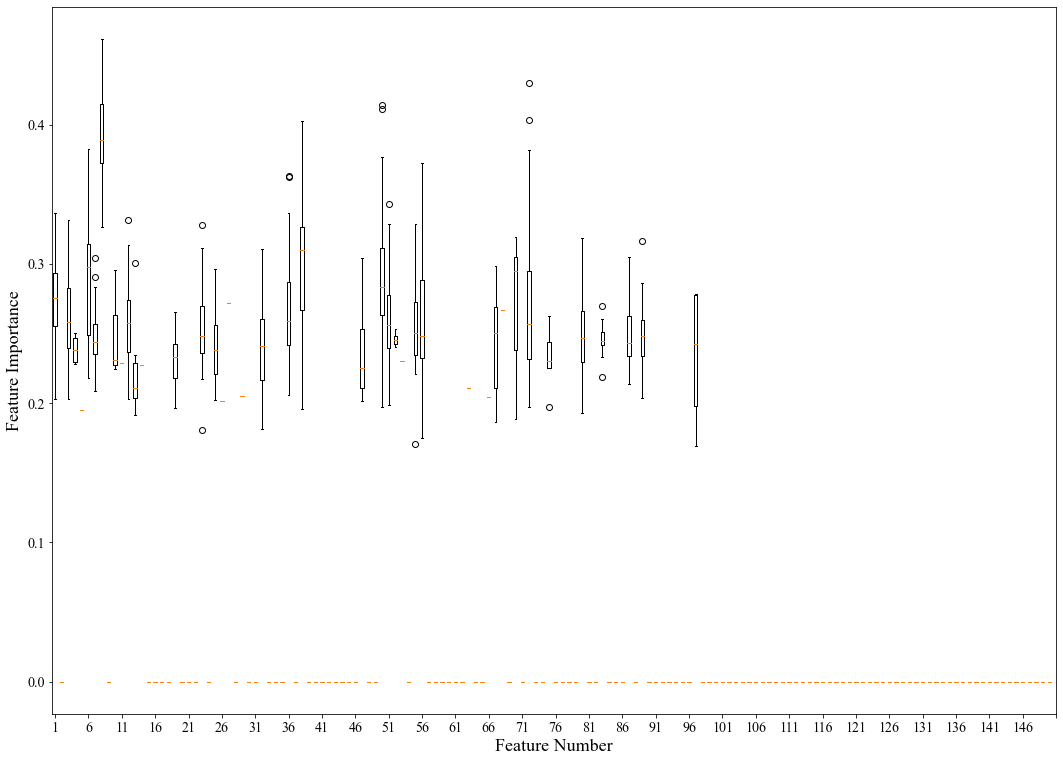

In [52]:
mlpc_coef_list  = [np.abs(l) if l != [] else 0 for l in mlpc_importance_dict.values()]
mlpc_label_list = [item.split()[-1] for item in X.columns.values]
mlpc_label_list.append("")
plt.boxplot(mlpc_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=mlpc_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [53]:
feature_avg_weight_dict = dict(zip(mlpc_label_list[0:-1], [np.mean(l) for l in zip(mlpc_coef_list)]))
feature_std_weight_dict = dict(zip(mlpc_label_list[0:-1], [np.std(l) for l in zip(mlpc_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[str(key)]))
    count += 1

Rank  1: 8, has an avg. importance of 0.3934 with a std. dev. of 0.0290.
Rank  2: 38, has an avg. importance of 0.2981 with a std. dev. of 0.0434.
Rank  3: 6, has an avg. importance of 0.2884 with a std. dev. of 0.0411.
Rank  4: 50, has an avg. importance of 0.2873 with a std. dev. of 0.0420.
Rank  5: 1, has an avg. importance of 0.2750 with a std. dev. of 0.0296.
Rank  6: 27, has an avg. importance of 0.2721 with a std. dev. of 0.0000.
Rank  7: 70, has an avg. importance of 0.2699 with a std. dev. of 0.0500.
Rank  8: 36, has an avg. importance of 0.2684 with a std. dev. of 0.0404.
Rank  9: 72, has an avg. importance of 0.2681 with a std. dev. of 0.0518.
Rank 10: 68, has an avg. importance of 0.2668 with a std. dev. of 0.0000.
Rank 11: 3, has an avg. importance of 0.2607 with a std. dev. of 0.0293.
Rank 12: 51, has an avg. importance of 0.2585 with a std. dev. of 0.0304.
Rank 13: 56, has an avg. importance of 0.2576 with a std. dev. of 0.0435.
Rank 14: 12, has an avg. importance of 0.2

The Neural Network performs moderatley worse than XGBoost on the held out test set, and performs better than the logistic regression. These results show valuable insight that these models may be able to provide predictive value in head coach hiring decisions in the NFL. The MLP feature importance weights differ greatly from the previous models.